In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("/content/social_media_vs_productivity.csv")
grid = sns.FacetGrid(df, row="gender", col="job_type", margin_titles=True)

grid.map(sns.scatterplot, "daily_social_media_time", "social_platform_preference", alpha=0.7, color="steelblue")

grid.set_axis_labels("daily_social_media_time", "social_platform_preference ")
print(df["daily_social_media_time"].describe())

grid.set_titles(col_template="{col_name}", row_template="{row_name}")


grid.tight_layout()

plt.show()

SyntaxError: invalid syntax (ipython-input-1-3977349572.py, line 15)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("social_media_vs_productivity.csv")

df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

features_to_check = [
    'daily_social_media_time',
    'sleep_hours',
    'stress_level',
    'number_of_notifications',
    'age'
]

def remove_outliers_iqr(data, features):
    verified_cleaned_data = data.copy()
    for column in features:
        Q1 = verified_cleaned_data[column].quantile(0.25)
        Q3 = verified_cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        verified_cleaned_data = verified_cleaned_data[
            (verified_cleaned_data[column] >= lower) &
            (verified_cleaned_data[column] <= upper)
        ]
    return verified_cleaned_data

df_clean = remove_outliers_iqr(df, features_to_check)
df_clean = df_clean.interpolate()
df_clean = df_clean.dropna()

df_clean['gender'] = df_clean['gender'].astype('category')
df_clean['job_type'] = df_clean['job_type'].astype('category')

print(df_clean["daily_social_media_time"].describe())

grid = sns.FacetGrid(df_clean, row="gender", col="job_type", margin_titles=True)

grid.map(
    sns.scatterplot,
    "daily_social_media_time",
    "social_platform_preference",
    alpha=0.7,
    color="steelblue"
)

grid.set_axis_labels("Daily Social Media Time", "Social Platform Preference")
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.tight_layout()

plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("social_media_vs_productivity.csv")

age_bins = [10, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

df['gender'] = df['gender'].astype('category')
df['age_group'] = df['age_group'].astype('category')

df = df.dropna(subset=[
    'daily_social_media_time',
    'social_platform_preference',
    'gender',
    'age_group'
])

print(df["daily_social_media_time"].describe())

grid = sns.FacetGrid(df, row="gender", col="age_group", margin_titles=True)

grid.map(
    sns.scatterplot,
    "daily_social_media_time",
    "social_platform_preference",
    alpha=0.7,
    color="steelblue"
)

grid.set_axis_labels("Daily Social Media Time", "Social Platform Preference")
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.tight_layout()
plt.show()


/tmp/ipython-input-21-1922610471.py:36: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df_clean.interpolate()


count    22907.000000
mean         3.029714
std          1.852859
min          0.000000
25%          1.633176
50%          2.998974
75%          4.324433
max          8.457550
Name: daily_social_media_time, dtype: float64


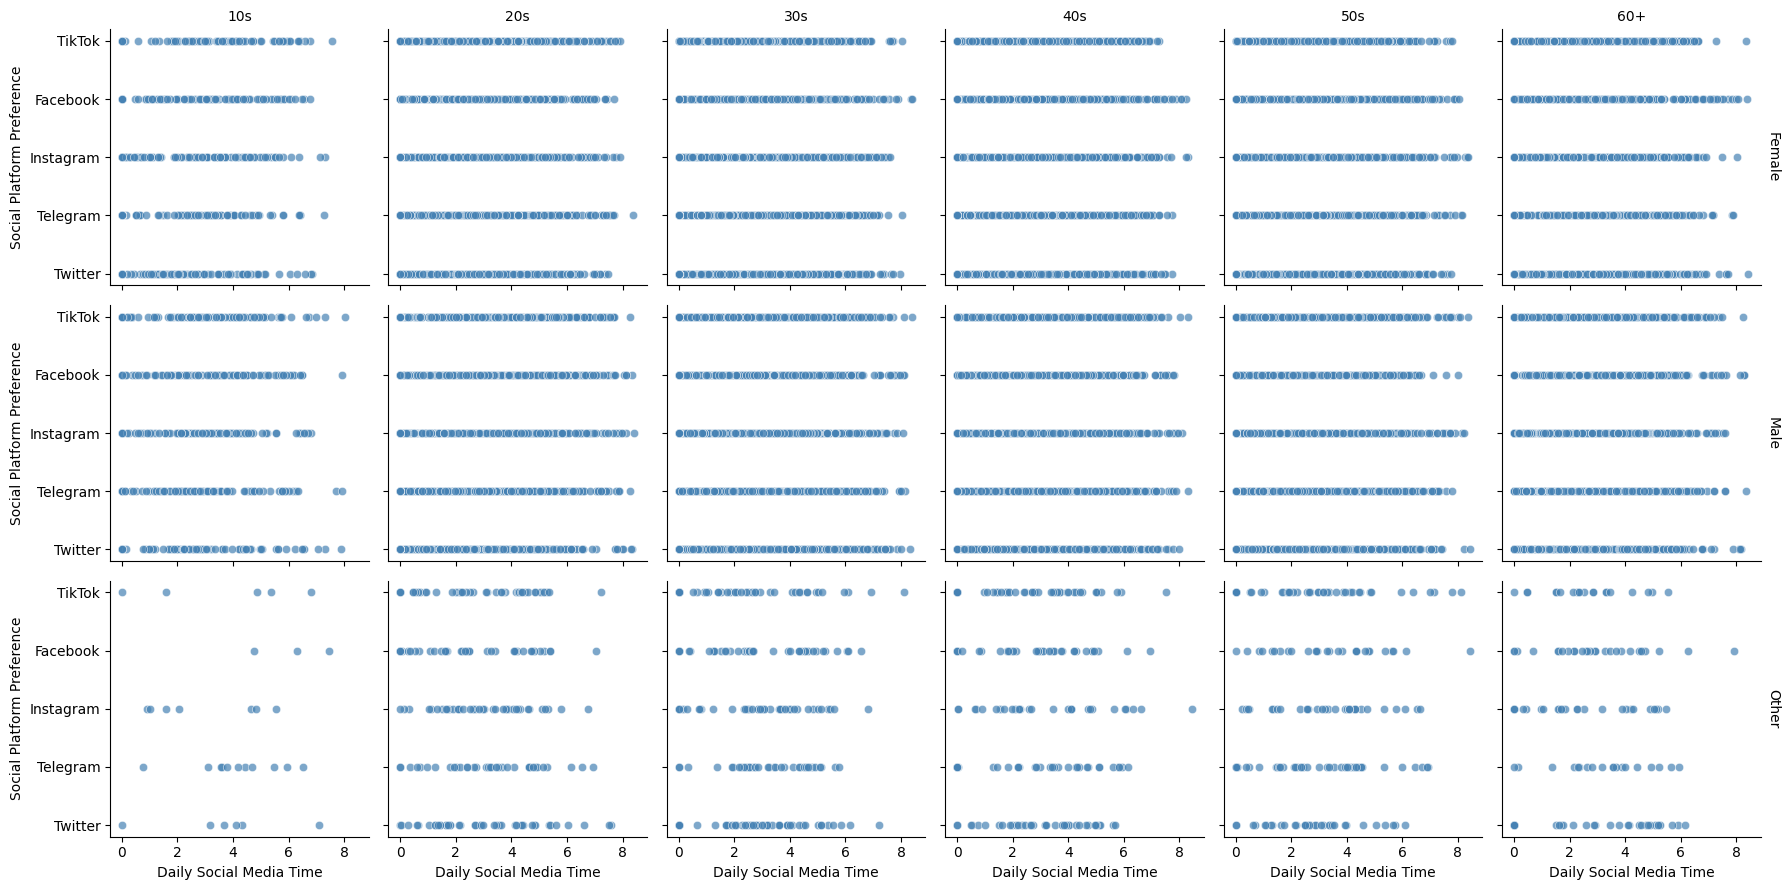

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("social_media_vs_productivity.csv")

df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

features_to_check = [
    'daily_social_media_time',
    'sleep_hours',
    'stress_level',
    'number_of_notifications',
    'age'
]

def remove_outliers_iqr(data, features):
    verified_cleaned_data = data.copy()
    for column in features:
        Q1 = verified_cleaned_data[column].quantile(0.25)
        Q3 = verified_cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        verified_cleaned_data = verified_cleaned_data[
            (verified_cleaned_data[column] >= lower) &
            (verified_cleaned_data[column] <= upper)
        ]
    return verified_cleaned_data

df_clean = remove_outliers_iqr(df, features_to_check)
df_clean = df_clean.interpolate()
df_clean = df_clean.dropna()

age_bins = [10, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels, right=False)

df_clean['gender'] = df_clean['gender'].astype('category')
df_clean['age_group'] = df_clean['age_group'].astype('category')

print(df_clean["daily_social_media_time"].describe())

grid = sns.FacetGrid(df_clean, row="gender", col="age_group", margin_titles=True)

grid.map(
    sns.scatterplot,
    "daily_social_media_time",
    "social_platform_preference",
    alpha=0.7,
    color="steelblue"
)

grid.set_axis_labels("Daily Social Media Time", "Social Platform Preference")
grid.set_titles(col_template="{col_name}", row_template="{row_name}")
grid.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/social_media_vs_productivity.csv")

# df['number_of_notifications'].describe()
# print(df['gender'].value_counts(normalize=True) * 100)

age_bins = [10, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# average_age_by_group = df.groupby('age_group')['age'].mean()
# print(average_age_by_group)

age_bins = [10, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['10s', '20s', '30s', '40s', '50s', '60+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# age_group_percentages = df['age_group'].value_counts(normalize=True) * 100

# age_group_percentages = age_group_percentages.reindex(age_labels)

# Print
# print(age_group_percentages.round(2))
# job_type_percentages = df['social_platform_preference'].value_counts(normalize=True) * 100
# print(job_type_percentages.round(2))
# print(df['uses_focus_apps'].value_counts())

import pandas as pd


df_clean = df.dropna()

print("Number of participants after removing nulls:", len(df_clean))

Number of participants after removing nulls: 17074


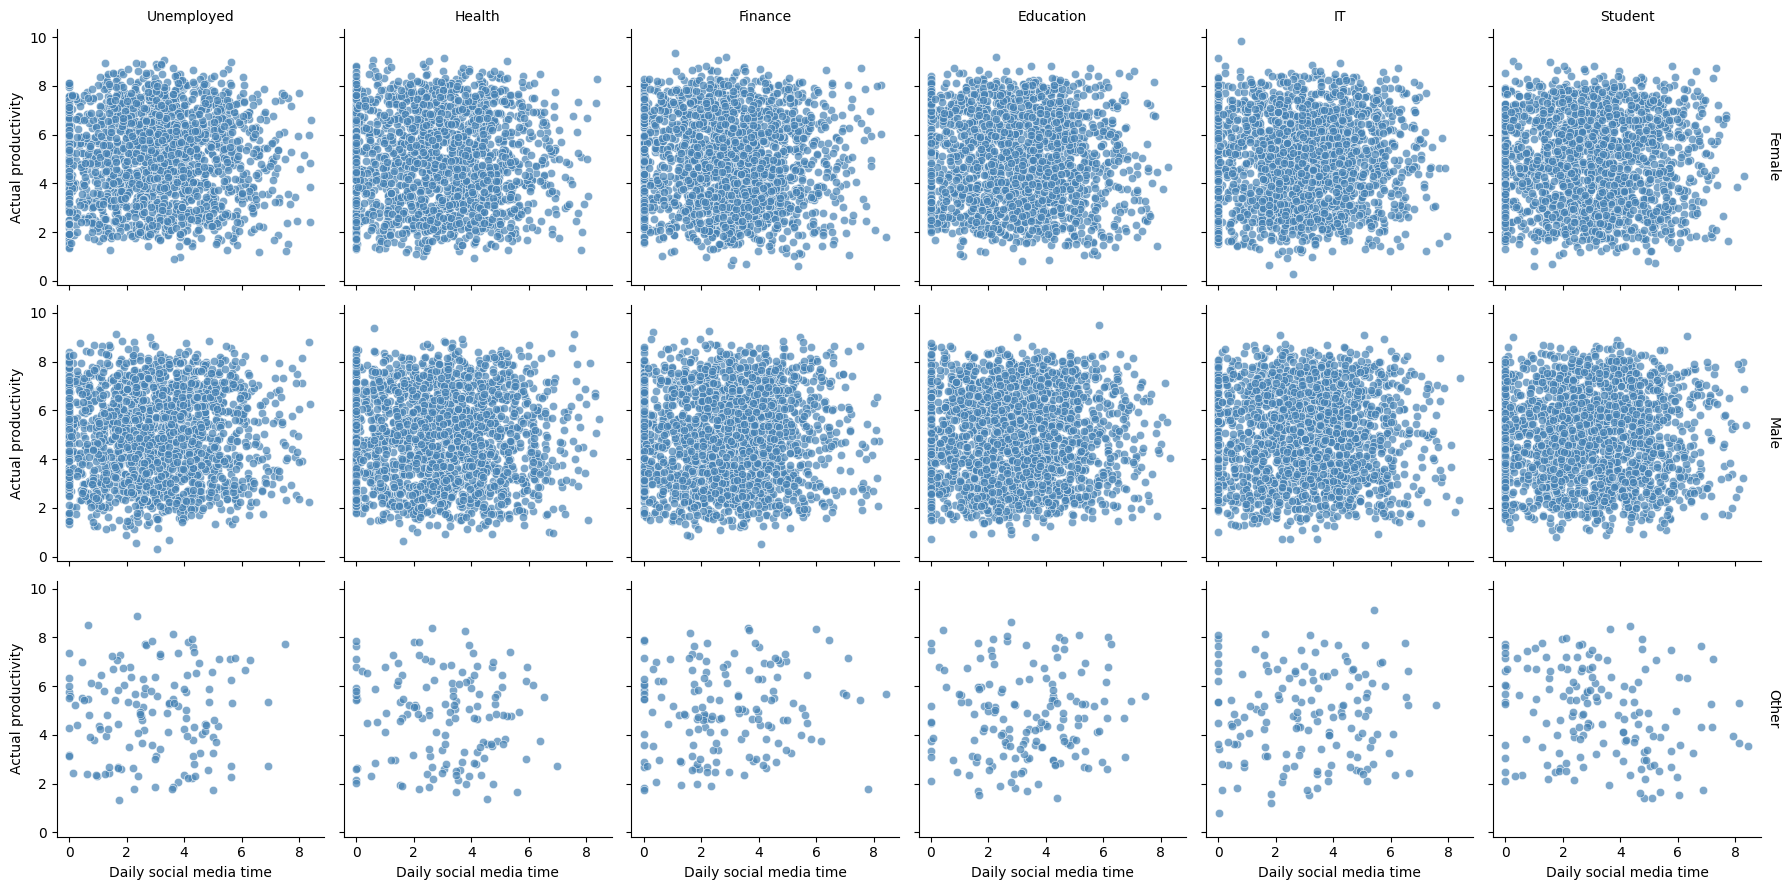

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- PREPROCESSING ---
df = pd.read_csv("social_media_vs_productivity.csv")

# # Convert booleans to numeric
# df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
# df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

# # List of numeric features to check for outliers
# features_to_check = [
#     'daily_social_media_time',
#     'sleep_hours',
#     'stress_level',
#     'number_of_notifications',
#     'age'
# ]

# # Remove outliers using IQR
# def remove_outliers_iqr(data, features):
#     data_clean = data.copy()
#     for column in features:
#         Q1 = data_clean[column].quantile(0.25)
#         Q3 = data_clean[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - 1.5 * IQR
#         upper = Q3 + 1.5 * IQR
#         data_clean = data_clean[(data_clean[column] >= lower) & (data_clean[column] <= upper)]
#     return data_clean

# # Clean the dataset
# df_clean = remove_outliers_iqr(df, features_to_check)
# df_clean = df_clean.interpolate()
# df_clean = df_clean.dropna()


# --- VISUALIZATION ---
grid = sns.FacetGrid(df_clean, row="gender", col="job_type", margin_titles=True)

grid.map(sns.scatterplot, "daily_social_media_time", "actual_productivity_score", alpha=0.7, color="steelblue")

grid.set_axis_labels("Daily social media time", "Actual productivity")
grid.set_titles(col_template="{col_name}", row_template="{row_name}")

grid.tight_layout()

plt.show()




/tmp/ipython-input-24-2488165012.py:35: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df_clean.interpolate()


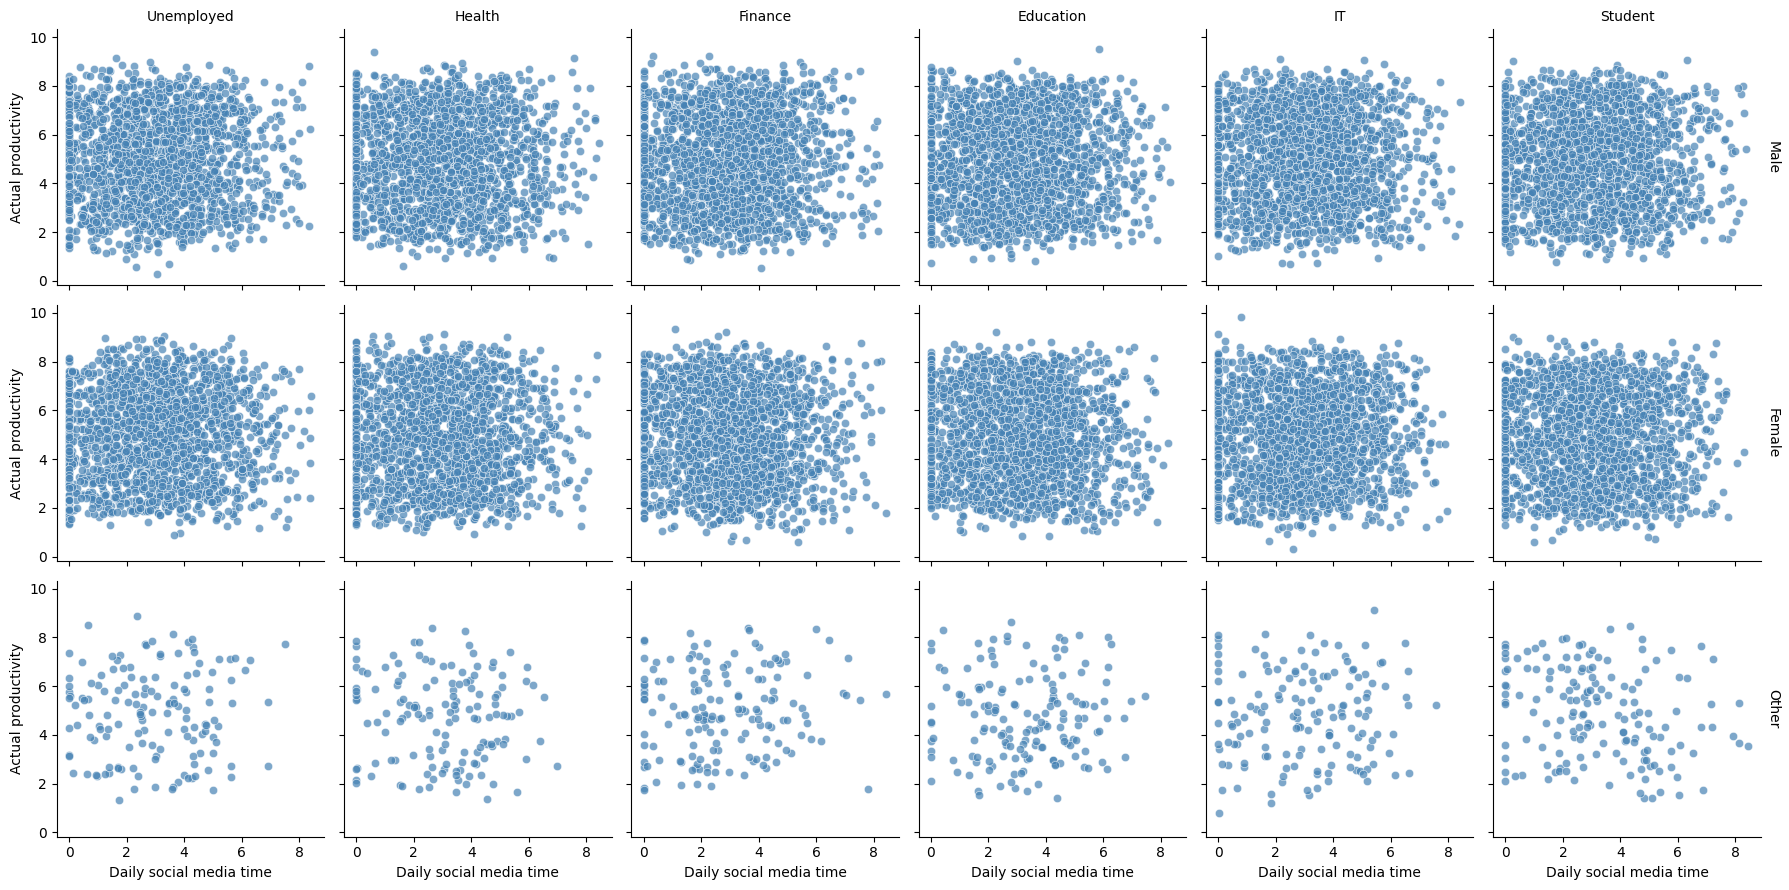

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- PREPROCESSING ---
df = pd.read_csv("social_media_vs_productivity.csv")

# Convert booleans to numeric
df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

# List of numeric features to check for outliers
features_to_check = [
    'daily_social_media_time',
    'sleep_hours',
    'stress_level',
    'number_of_notifications',
    'age'
]

# Remove outliers using IQR
def remove_outliers_iqr(data, features):
    data_clean = data.copy()
    for column in features:
        Q1 = data_clean[column].quantile(0.25)
        Q3 = data_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data_clean = data_clean[(data_clean[column] >= lower) & (data_clean[column] <= upper)]
    return data_clean

# Clean the dataset
df_clean = remove_outliers_iqr(df, features_to_check)
df_clean = df_clean.interpolate()
df_clean = df_clean.dropna()

# DO NOT one-hot encode 'gender' or 'job_type' if you're using them in FacetGrid
# So skip this: pd.get_dummies(...)

# --- VISUALIZATION ---
grid = sns.FacetGrid(df_clean, row="gender", col="job_type", margin_titles=True)

# Map scatterplot to grid
grid.map(sns.scatterplot, "daily_social_media_time", "actual_productivity_score", alpha=0.7, color="steelblue")

# Set axis labels and titles
grid.set_axis_labels("Daily social media time", "Actual productivity")
grid.set_titles(col_template="{col_name}", row_template="{row_name}")

# Layout
grid.tight_layout()

# Show plot
plt.show()





🔢 Full Correlation Matrix (Cleaned):
                                     age  daily_social_media_time  \
age                             1.000000                -0.003778   
daily_social_media_time        -0.003778                 1.000000   
number_of_notifications        -0.003964                -0.000905   
work_hours_per_day             -0.005925                -0.001483   
perceived_productivity_score    0.012119                -0.008869   
actual_productivity_score       0.013904                -0.004155   
stress_level                    0.001213                 0.002651   
sleep_hours                     0.005211                 0.005796   
screen_time_before_sleep        0.008664                -0.007031   
breaks_during_work             -0.013583                 0.008060   
uses_focus_apps                -0.001552                -0.008827   
has_digital_wellbeing_enabled  -0.001959                 0.002911   
coffee_consumption_per_day      0.002908                -0.005696

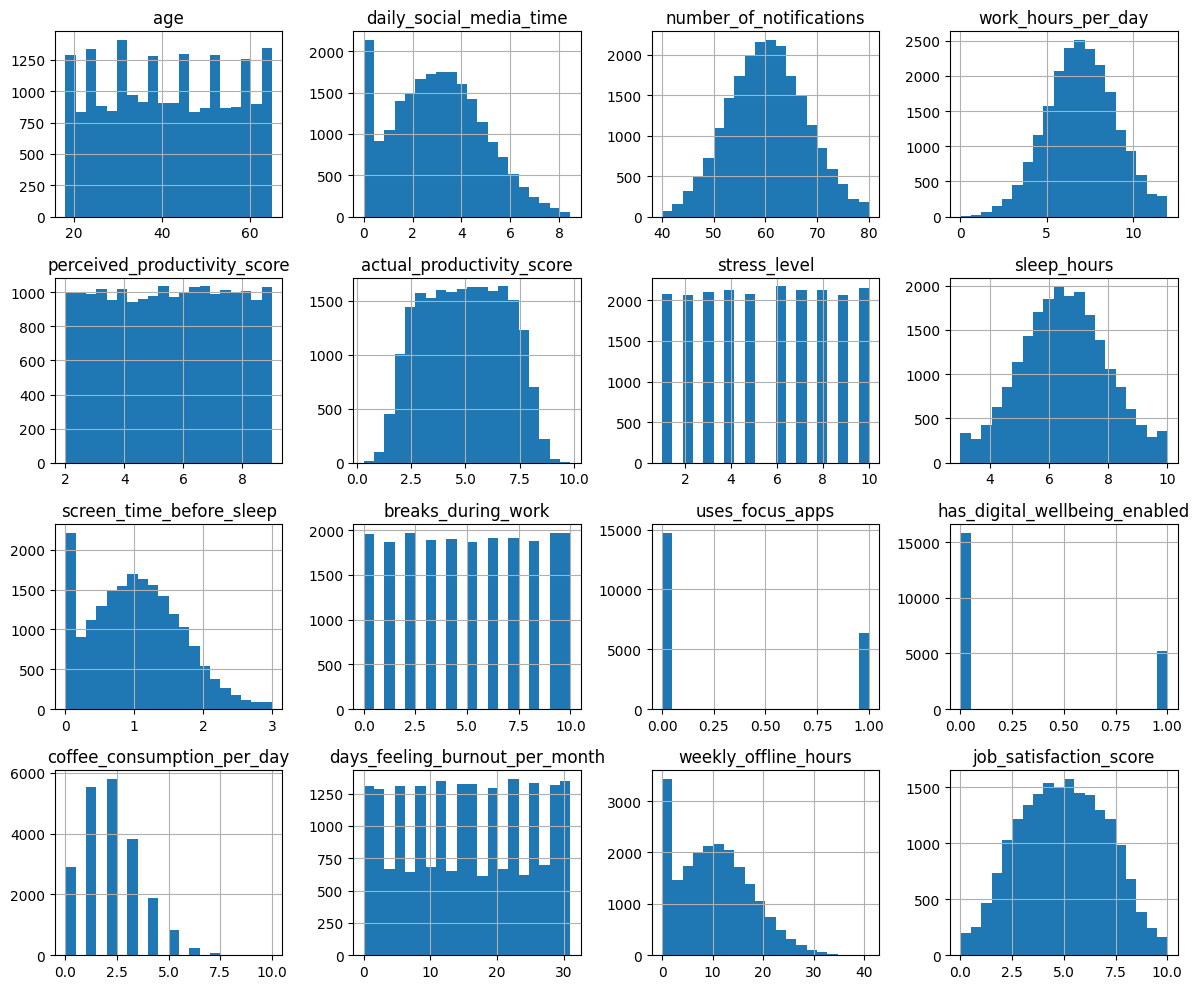


📊 Grouped Correlation (daily_social_media_time vs actual_productivity_score):
gender  job_type                           
Female  Education   daily_social_media_time   -0.043152
        Finance     daily_social_media_time   -0.043284
        Health      daily_social_media_time   -0.022983
        IT          daily_social_media_time    0.003426
        Student     daily_social_media_time   -0.004172
        Unemployed  daily_social_media_time    0.008693
Male    Education   daily_social_media_time    0.012426
        Finance     daily_social_media_time    0.043077
        Health      daily_social_media_time   -0.006851
        IT          daily_social_media_time    0.004713
        Student     daily_social_media_time   -0.006699
        Unemployed  daily_social_media_time    0.015944
Other   Education   daily_social_media_time    0.021097
        Finance     daily_social_media_time    0.098921
        Health      daily_social_media_time   -0.107980
        IT          daily_social_medi

/tmp/ipython-input-25-3558557564.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['gender', 'job_type'])[['daily_social_media_time', 'actual_productivity_score']]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("social_media_vs_productivity.csv")

# Convert booleans to numeric
df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

# Convert facet columns to category for later
df['gender'] = df['gender'].astype('category')
df['job_type'] = df['job_type'].astype('category')

# Light cleaning: remove outliers from selected numeric features
features_to_check = [
    'daily_social_media_time',
    'sleep_hours',
    'stress_level',
    'number_of_notifications',
    'age',
    'actual_productivity_score'
]

def remove_outliers_iqr(data, features):
    cleaned = data.copy()
    for col in features:
        Q1 = cleaned[col].quantile(0.25)
        Q3 = cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        cleaned = cleaned[(cleaned[col] >= lower) & (cleaned[col] <= upper)]
    return cleaned

# Clean the dataset
df_clean = remove_outliers_iqr(df, features_to_check)

# Drop rows with missing values in key variables for plotting/correlation
df_clean = df_clean.dropna(subset=[
    'daily_social_media_time',
    'actual_productivity_score',
    'gender',
    'job_type'
])

# -------------------------------
# 1. Full correlation matrix
print("\n🔢 Full Correlation Matrix (Cleaned):")
corr_matrix = df_clean.select_dtypes(include='number').corr()
print(corr_matrix)

# 2. Sorted correlations with productivity
print("\n📊 Correlation with Actual Productivity (Sorted):")
correlations = corr_matrix['actual_productivity_score'].abs().sort_values(ascending=False)
print(correlations)

# 3. Value counts of categorical variables
print("\n Gender Value Counts:")
print(df_clean['gender'].value_counts())
print("\n Job Type Value Counts:")
print(df_clean['job_type'].value_counts())

# 4. Skewness of numeric features
print("\n Skewness of Numeric Features:")
print(df_clean.select_dtypes(include='number').skew())

# 5. Histograms for visualizing distributions
print("\n Displaying Histograms for Numeric Features...")
df_clean.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# 6. Grouped correlation (by gender and job type)
print("\n Grouped Correlation (daily_social_media_time vs actual_productivity_score):")
group_corrs = (
    df_clean
    .groupby(['gender', 'job_type'])[['daily_social_media_time', 'actual_productivity_score']]
    .corr()
    .iloc[0::2, -1]  # get only the correlation values
)
print(group_corrs)


In [ ]:
import pandas as pd

# Define age bins and labels
age_bins = [10, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['10s', '20s', '30s', '40s', '50s', '60+']

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate percentage of each age group within each job type
age_job_pct = df.groupby(['job_type', 'age_group']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# Show the result nicely formatted
print(age_job_pct.unstack().fillna(0).round(2))


age_group               10s    20s    30s    40s    50s    60+
job_type   job_type                                           
Education  Education   3.80  20.38  21.07  20.51  20.63  13.61
Finance    Finance     3.93  20.35  21.21  20.19  21.57  12.76
Health     Health      4.06  20.48  21.11  21.21  20.42  12.73
IT         IT          3.94  20.51  22.16  20.89  20.35  12.14
Student    Student     4.37  21.11  21.37  20.71  20.67  11.77
Unemployed Unemployed  4.40  20.45  21.92  20.86  19.62  12.75


/tmp/ipython-input-26-2047378430.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_job_pct = df.groupby(['job_type', 'age_group']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
/tmp/ipython-input-26-2047378430.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_job_pct = df.groupby(['job_type', 'age_group']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load your cleaned dataset
# df_clean = pd.read_csv("social_media_vs_productivity.csv")

# # Convert any necessary booleans to int (if not already)
# df_clean['uses_focus_apps'] = df_clean['uses_focus_apps'].astype(int)
# df_clean['has_digital_wellbeing_enabled'] = df_clean['has_digital_wellbeing_enabled'].astype(int)

# # Select 7 relevant numerical features
# num_features = [
#     'daily_social_media_time',
#     'actual_productivity_score',
#     'perceived_productivity_score',
#     'stress_level',
#     'sleep hours',
#     'screen_time_before_sleep',
#     'days_feeling_burnout_per_month'
# ]

# # Calculate correlation
# corr = df_clean[num_features].corr()
# print("Correlation Matrix:")
# print(corr)

# # Plot heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Heatmap of 7 Features")
# plt.tight_layout()
# plt.show()


KeyError: "['sleep hours'] not in index"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the "tips" dataset
# tips = sns.load_dataset("/content/social_media_vs_productivity.csv")

# Create a FacetGrid with rows and columns based on 'time' and 'day'
grid = sns.FacetGrid(df, row="gender", col="job_type", margin_titles=True)

# Map a scatter plot onto the grid
grid.map(sns.scatterplot, "daily_social_media_time", "actual_productivity_score", alpha=0.7, color="steelblue")

# Add titles to the plots
grid.set_axis_labels("Daily social media time", "actual productivity ")
grid.set_titles(col_template="{col_name}", row_template="{row_name}")

# Adjust the layout
grid.tight_layout()

# Display the plot
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['job_type'].fillna(df['job_type'].mode()[0], inplace=True)

plt.figure(figsize=(15, 10))


sns.scatterplot(
    data=df,
    x='sleep_hours',
    y='actual_productivity_score',
    hue='job_type',
    style= 'gender',

    alpha=0.4,
    s=40
)



plt.xlim(3, 10)
plt.ylim(0, 10)
plt.title("Sleep Hours vs Productivity ")
plt.xlabel("Sleep Hours")
plt.ylabel("Actual Productivity Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- LOAD DATA ---
df = pd.read_csv("/content/social_media_vs_productivity.csv")

# --- CONVERT BOOLEANS TO NUMERIC ---
df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

# --- REMOVE OUTLIERS USING IQR ---
features_to_check = [
    'daily_social_media_time',
    'sleep_hours',
    'stress_level',
    'number_of_notifications',
    'age'
]

def remove_outliers_iqr(data, features):
    data_clean = data.copy()
    for column in features:
        Q1 = data_clean[column].quantile(0.25)
        Q3 = data_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data_clean = data_clean[(data_clean[column] >= lower) & (data_clean[column] <= upper)]
    return data_clean

df_clean = remove_outliers_iqr(df, features_to_check)
df_clean = df_clean.interpolate()
df_clean = df_clean.dropna()

# --- PLOT: SOCIAL MEDIA TIME VS PRODUCTIVITY (COLORED BY AGE) ---
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_clean,
    x='daily_social_media_time',
    y='actual_productivity_score',
    hue='age',
    palette='coolwarm'
)

plt.xlim(0, 18)
plt.xticks(np.arange(0, 18.1, 0.5))
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

plt.title("Daily Social Media Time vs Productivity (Colored by Age)")
plt.xlabel("Daily Social Media Time")
plt.ylabel("Actual Productivity Score")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
sns.scatterplot(
    data=df,
    x="daily_social_media_time",       # numeric
    y="perceived_productivity_score",        # numeric
    hue="social_platform_preference",            # categorical: changes color
    style="gender",              # categorical: changes marker shape
    size="body_mass_g",       # numeric: changes marker size
    sizes=(20, 200),          # min/max size of points
    alpha=0.7                 # transparency
)

plt.title("Scatterplot with hue, style, and size")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/social_media_vs_productivity.csv")

# 1. Social Media vs Productivity (colored by Age)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='daily_social_media_time', y='actual_productivity_score', hue='age', palette='coolwarm')
plt.title("Daily Social Media Time vs Productivity (Colored by Age)")
plt.xlabel("Daily Social Media Time")
plt.ylabel("Actual Productivity Score")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Breaks vs Productivity (colored by Job Type)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='breaks_during_work', y='actual_productivity_score', hue='job_type', palette='Set2')
plt.title("Breaks During Work vs Productivity by Job Type")
plt.xlabel("Breaks During Work")
plt.ylabel("Actual Productivity Score")
plt.legend(title="Job Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Work Hours vs Productivity (colored by Social Media Time)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='work_hours_per_day', y='actual_productivity_score', hue='daily_social_media_time', palette='plasma')
plt.title("Work Hours vs Productivity (Colored by Social Media Time)")
plt.xlabel("Work Hours Per Day")
plt.ylabel("Actual Productivity Score")
plt.legend(title="Social Media Time", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Age vs Work Hours (colored by Productivity)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='age', y='work_hours_per_day', hue='actual_productivity_score', palette='inferno')
plt.title("Age vs Work Hours (Colored by Productivity)")
plt.xlabel("Age")
plt.ylabel("Work Hours Per Day")
plt.legend(title="Productivity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
